In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)


In [2]:
df = pd.read_csv("Global_Pollution_Analysis.csv")
df.head()


,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   Air_Pollution_Index                     200 non-null    float64
 3   Water_Pollution_Index                   200 non-null    float64
 4   Soil_Pollution_Index                    200 non-null    float64
 5   Industrial_Waste (in tons)              200 non-null    float64
 6   Energy_Recovered (in GWh)               200 non-null    float64
 7   CO2_Emissions (in MT)                   200 non-null    float64
 8   Renewable_Energy (%)                    200 non-null    float64
 9   Plastic_Waste_Produced (in tons)        200 non-null    float64
 10  Energy_Consumption_Per_Capita (in MWh)  200 non-null    float6

,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
count,200.000000,200.00000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,2009.335000,180.62695,115.068100,76.488550,52891.68150,260.448700,24.878100,27.799700,24492.893550,9.43575,104.271300,35307.602400
std,5.765325,67.07331,47.580911,39.692727,27224.49169,147.141923,14.470892,12.361879,14421.356002,5.57567,56.906574,19481.714455
min,2000.000000,50.30000,31.130000,11.150000,1019.37000,11.730000,1.920000,5.040000,542.950000,0.53000,2.320000,1298.700000
25%,2004.000000,134.97250,74.550000,40.895000,31201.97250,118.355000,11.220000,17.700000,12843.882500,4.58250,60.960000,19525.020000
50%,2010.000000,183.38500,112.305000,78.600000,55299.15000,273.140000,25.355000,29.170000,24121.540000,9.22500,104.965000,35043.325000
75%,2014.000000,237.42500,157.477500,109.212500,74805.82500,384.957500,38.550000,37.072500,36516.232500,13.99750,150.930000,51629.547500
max,2019.000000,297.95000,199.320000,149.230000,99739.36000,499.980000,49.690000,49.560000,49852.280000,19.98000,198.820000,69143.140000


In [4]:
df.isnull().sum()



Country                                   0
Year                                      0
Air_Pollution_Index                       0
Water_Pollution_Index                     0
Soil_Pollution_Index                      0
Industrial_Waste (in tons)                0
Energy_Recovered (in GWh)                 0
CO2_Emissions (in MT)                     0
Renewable_Energy (%)                      0
Plastic_Waste_Produced (in tons)          0
Energy_Consumption_Per_Capita (in MWh)    0
Population (in millions)                  0
GDP_Per_Capita (in USD)                   0
dtype: int64

In [6]:
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())


In [7]:
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


In [8]:
le = LabelEncoder()

df['Country'] = le.fit_transform(df['Country'])
df['Year'] = le.fit_transform(df['Year'])


In [11]:
print(df.columns)



Index(['Country', 'Year', 'Air_Pollution_Index', 'Water_Pollution_Index',
       'Soil_Pollution_Index', 'Industrial_Waste (in tons)',
       'Energy_Recovered (in GWh)', 'CO2_Emissions (in MT)',
       'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)',
       'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)',
       'GDP_Per_Capita (in USD)'],
      dtype='object')


In [12]:
'CO2 Emissions'
'Industrial Waste (tons)'


'Industrial Waste (tons)'

In [14]:
df.columns = (
    df.columns
      .str.strip()
      .str.replace(" ", "_", regex=False)
      .str.replace("(", "", regex=False)
      .str.replace(")", "", regex=False)
)


In [15]:
from sklearn.preprocessing import StandardScaler

scale_cols = [
    'Air_Pollution_Index',
    'Water_Pollution_Index',
    'Soil_Pollution_Index',
    'Industrial_Waste_in_tons',
    'CO2_Emissions_in_MT'
]


In [16]:
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])


In [17]:
X = df[
    [
        'Air_Pollution_Index',
        'Water_Pollution_Index',
        'Soil_Pollution_Index',
        'Industrial_Waste_in_tons',
        'CO2_Emissions_in_MT'
    ]
]

y = df['Energy_Recovered_in_GWh']


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [19]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [20]:
y_pred = lr_model.predict(X_test)


In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))


R² Score: -0.014714244281428979
Mean Squared Error (MSE): 24538.05990863565
Mean Absolute Error (MAE): 141.345969590013


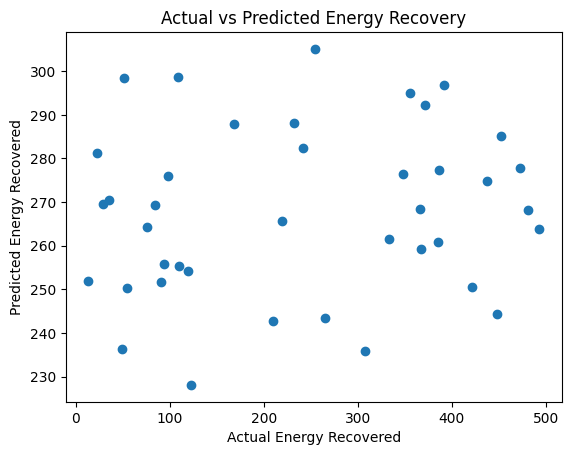

In [22]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Energy Recovered")
plt.ylabel("Predicted Energy Recovered")
plt.title("Actual vs Predicted Energy Recovery")
plt.show()


In [23]:
df['Total_Pollution'] = (
    df['Air_Pollution_Index'] +
    df['Water_Pollution_Index'] +
    df['Soil_Pollution_Index']
)


In [28]:
df['Pollution_Level'] = pd.cut(
    df['Total_Pollution'],
    bins=[-float('inf'), -0.5, 0.5, float('inf')],
    labels=['Low', 'Medium', 'High']
)


In [25]:
X = df[['Air_Pollution_Index', 'CO2_Emissions_in_MT']]
y = df['Pollution_Level']


In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [29]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [30]:
y_pred = log_model.predict(X_test)


In [32]:
df['Pollution_Level'] = pd.qcut(
    df['Total_Pollution'],
    q=3,
    labels=['Low', 'Medium', 'High']
)



In [33]:
X = df[['Air_Pollution_Index', 'CO2_Emissions_in_MT']]
y = df['Pollution_Level']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)


In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, zero_division=0))


              precision    recall  f1-score   support

           0       0.73      0.79      0.76        14
           1       0.64      0.54      0.58        13
           2       0.43      0.46      0.44        13

    accuracy                           0.60        40
   macro avg       0.60      0.60      0.60        40
weighted avg       0.60      0.60      0.60        40



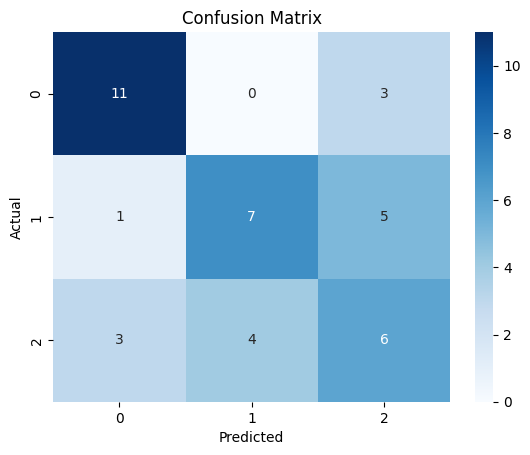

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
